<a href="https://colab.research.google.com/github/Ziddle-tech/openai-quickstart-node/blob/master/Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("customer_churn_dataset-training-master.csv")  # Replace with your dataset name

Saving customer_churn_dataset-training-master.csv to customer_churn_dataset-training-master.csv


   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.

<Axes: xlabel='Payment Delay', ylabel='count'>

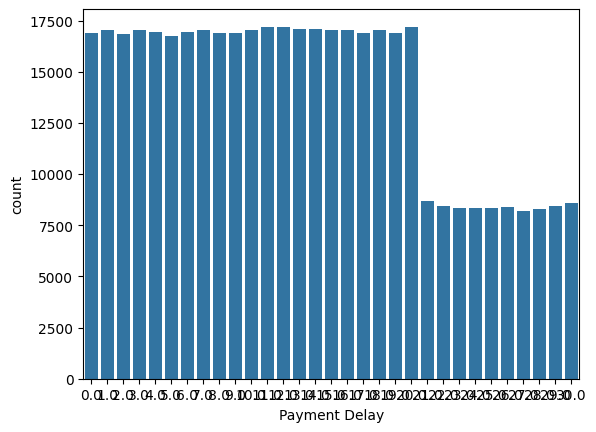

In [16]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
sns.countplot(x='Payment Delay', data=df)  # Replace 'churn' with your target column

In [33]:
df['Payment Delay'] = df['Payment Delay'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, drop_first=True)

In [34]:
X = df.drop('Payment Delay', axis=1)
y = df['Payment Delay']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building The **Model**

In [42]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling The Model

In [43]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training The **Model**

In [44]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=16,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
17634/17634 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/20
17634/17634 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/20
17634/17634 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/20
17634/17634 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/20
17634/17634 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/20
17634/17634 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/20
17634/17634 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/20
17634/17634 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/ste

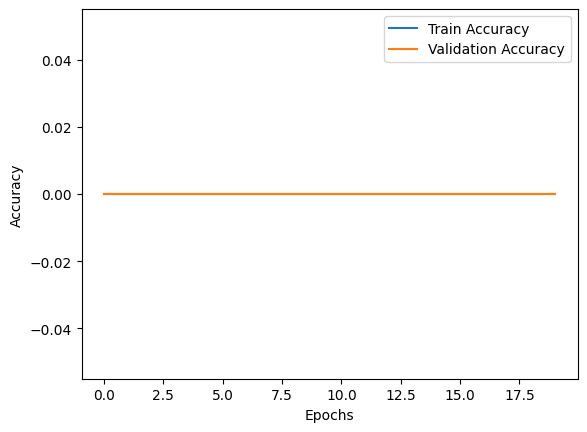

In [45]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluating The **Model**

In [46]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

2756/2756 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0000e+00 - loss: nan
Test Accuracy: 0.00


In [47]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

2756/2756 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

# Ensure y_test is of type int
y_test = y_test.astype(int)

# Predict probabilities and then convert to class labels
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Reshape y_pred to be 1-dimensional if necessary
y_pred = y_pred.reshape(-1)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2756/2756 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
[[  0   0   0 ...   0   0   0]
 [ 38   0   0 ...   0   0   0]
 [ 49   0   0 ...   0   0   0]
 ...
 [126   0   0 ...   0   0   0]
 [119   0   0 ...   0   0   0]
 [ 12   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
         100       0.00      0.00      0.00      38.0
         101       0.00      0.00      0.00      49.0
         102       0.00      0.00      0.00      50.0
         103       0.00      0.00      0.00      65.0
         104       0.00      0.00      0.00      53.0
         105       0.00      0.00      0.00      47.0
         106       0.00      0.00      0.00      52.0
         107       0.00      0.00      0.00      65.0
         108       0.00      0.00      0.00      49.0
         109       0.00      0.00      0.00      60.0
         110       0.00      0.00      0.00      65.0
         111       0.00      0.00      0.00      50.0
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [50]:
model.save('churn_prediction_model.keras')